<a href="https://colab.research.google.com/github/MohammadRahavi/Salaries_Cyber-EDA/blob/main/Cyber_Security_Job_Salaries_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cyber Security Job Salaries EDA**

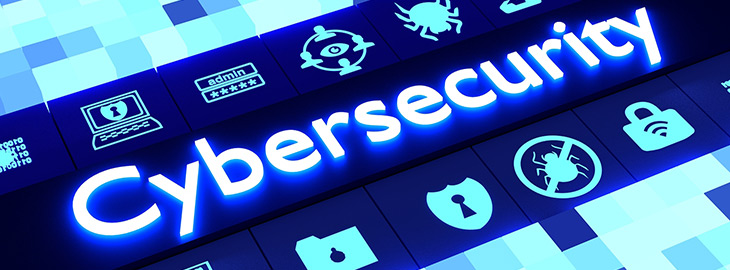

Cybersecurity is the protection of internet-connected systems, such as hardware and software, from cyberthreats. This practice is used by individuals and businesses to protect against unauthorized access to data centers and other computerized systems. A strong cybersecurity strategy can provide a good security posture against malicious attacks aimed at accessing, modifying, deleting, destroying, or extorting an organization's or users' systems and sensitive data. Cybersecurity also helps prevent attacks that compromise the operation of systems and devices.

# **Information About Each Columns**

* **work_year:** The year the salary was paid.
* **experience_level:** The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director
* **employment_type:**The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance
* **salary:** The total gross salary amount paid.
* salary_currency: The currency of the salary paid as an ISO 4217 currency code.
* **salaryinusd:**The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio:** The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
* **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size:** The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

# **Importing Libraries**

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px

# **Loading Dataset**

In [27]:
df = pd.read_csv("salaries_cyber.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


# **Checking Shape of the Dataset**

In [28]:
df.shape

(1247, 11)

# **Checking all the Columns in the Dataset**

In [29]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# **Information about the Dataset**

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [31]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,1247.000000,1.247000e+03,1247.000000,1247.000000
mean,2021.316760,5.608525e+05,120278.218925,71.491580
std,0.715501,1.415944e+07,70291.394942,39.346851
min,2020.000000,1.740000e+03,2000.000000,0.000000
25%,2021.000000,7.975450e+04,74594.500000,50.000000
50%,2021.000000,1.200000e+05,110000.000000,100.000000
75%,2022.000000,1.600800e+05,150000.000000,100.000000
max,2022.000000,5.000000e+08,910991.000000,100.000000


# **Checking For Null Values**

In [32]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

# **Count Number of Distinct Elements**

In [33]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              87
salary                384
salary_currency        21
salary_in_usd         579
employee_residence     58
remote_ratio            3
company_location       55
company_size            3
dtype: int64

# **Checking For Duplicate Values**

In [34]:
df.duplicated().sum()

85

# **Remove Duplicate Rows**

In [35]:
df_new = df.drop_duplicates()
df_new.duplicated().sum()

0

# **Analysis of Job Title**

In [36]:
jobs = df.groupby('job_title').size().reset_index().sort_values(by=0,ascending = False)
jobs.head(10)

,job_title,0
68,Security Engineer,194
14,Cyber Security Analyst,133
57,Penetration Tester,70
46,Information Security Manager,64
17,Cyber Security Engineer,63
65,Security Analyst,47
40,Information Security Analyst,39
19,Cyber Security Specialist,31
22,Cyber Threat Intelligence Analyst,29
64,SOC Analyst,28


In [37]:
job_title = df_new["job_title"].value_counts().head(10)
fig = px.bar(job_title, x=job_title.index, y=job_title.values, color=job_title.index, text=job_title.values, labels={'index':'job title','y':'count','text':'count'}, template= "ggplot2",title= "Top 10 Job Title")
fig.show()

In [38]:
fig = px.pie(job_title, names=job_title.index, values=job_title.values, color=job_title.index, labels={'index':'job title','y':'count','text':'count'}, template= "ggplot2",title= "Top 10 Job Title")
fig.show()

# **Analysis of which Roles earn the most salaries in Cyber Security**

In [39]:
fig=px.bar(df_new.groupby("job_title",as_index=False)["salary_in_usd"].max().sort_values(by="salary_in_usd",ascending=False).head(10),x="job_title",y="salary_in_usd",color="job_title",labels={'job_title':'job title','salary_in_usd':'salary(USD)'},text="salary_in_usd",template="ggplot2",title="Analysis of which roles earn the most salaries")
fig.show()

In [40]:
fig=px.pie(df_new.groupby("job_title",as_index=False)["salary_in_usd"].max().sort_values(by="salary_in_usd",ascending=False).head(10),names="job_title",values="salary_in_usd",color="job_title",labels={'job_title':'job title','salary_in_usd':'salary(USD)'},template="ggplot2",title="Analysis of which roles earn the most salaries")
fig.show()

# **Analyzing The Effect of Experience Level in Cyber Security**

In [41]:
exp_levels = df_new.groupby("experience_level")["salary_in_usd"].mean().reset_index()
exp_levels

,experience_level,salary_in_usd
0,EN,63417.080952
1,EX,200160.333333
2,MI,102897.645408
3,SE,141978.432377


In [42]:
fig=px.bar(df_new.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),x='experience_level',y='salary_in_usd',color='experience_level',labels={'experience_level':'Experience level ','salary_in_usd':'count'},template='ggplot2',text_auto=True,title="Experience Level in Cyber Security")
fig.show()

In [43]:
fig=px.pie(df_new.groupby('experience_level',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='experience_level',values='salary_in_usd',color='experience_level',template='ggplot2',title="Experience Level in Cyber Security")
fig.show()

# **Analysis of Employee Level in Cyber Security**

In [44]:
fig=px.bar(df_new.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),x='employment_type',y='salary_in_usd',color='employment_type',labels={'employment_type':'Employment level','salary_in_usd':'count'},template='ggplot2',text_auto=True,title="Employee Level in Cyber Security")
fig.show()

In [45]:
fig=px.pie(df_new.groupby('employment_type',as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd',ascending=False).head(10),names='employment_type',values='salary_in_usd',color='employment_type',labels={'employment_type':'Employment level','salary_in_usd':'count'},template="ggplot2",title="Employee Level in Cyber Security")
fig.show()

# **Analysis of most working year**

In [46]:
Work_Year=df_new["work_year"].value_counts()
fig=px.pie(df_new,values=Work_Year.values,names=Work_Year.index,color=Work_Year.index,title='Work_Year_perc',template='ggplot2')
fig.show()

# **Top 10 Countries having maximum Cyber Security Jobs**

In [47]:
fig=px.bar(df_new.groupby('company_location',as_index=False)['experience_level'].count().sort_values(by='experience_level',ascending=False).head(10),x='company_location',y='experience_level',color_discrete_sequence=['orange'],labels={'experience_level':'count'},template='ggplot2',title='Top 10 Countries having maximum Cyber Security Jobs')
fig.show()

# **Analysis of the Effect of Company Size of Salary**

In [48]:
company_size = df_new.groupby("company_size")["salary_in_usd"].mean().reset_index()
company_size

,company_size,salary_in_usd
0,L,120795.671958
1,M,121695.457413
2,S,83724.662921


In [49]:
fig = px.bar(company_size, x ="company_size", y ="salary_in_usd", text_auto=True ,color ="salary_in_usd" , template='ggplot2')
fig.show()